In [2]:
import tweepy
from tweepy import OAuthHandler

In [14]:
consumer_key = "--------------------------"
consumer_secret_key = "-------------------------------------------------"
access_token = "--------------------------------------------------"
access_secret = "---------------------------------"

auth = OAuthHandler(consumer_key, consumer_secret_key )
auth.set_access_token(access_token ,access_secret )

In [15]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [17]:
result = []
for tweet in tweepy.Cursor(api.search, q = "RahulGandhi", lang = "en", since = "2018-12-1" ).items(20000):
    #print(tweet.created_at, tweet.text)
    result.append(tweet)

In [18]:
import pandas as pd

In [19]:
def tweet_df(result):
    id_list = [tweet.id for tweet in result]
    dataset = pd.DataFrame(id_list, columns = ["id"])
    
    dataset["text"] = [tweet.text for tweet in result]
    dataset["retweet"] = [tweet.retweet for tweet in result]
    dataset["#tag"] = [tweet.entities.get("hastag") for tweet in result]
    dataset["user_location"] = [tweet.author.location for tweet in result]
    dataset["User Name"] = [tweet.author.screen_name for tweet in result]
    
    return dataset

In [20]:
dataset = tweet_df(result)
dataset

,id,text,retweet,#tag,user_location,User Name
0,1085118103590039552,"@RahulGandhi Yes Pappu, it's nothing compared...",<bound method Status.retweet of Status(_api=<t...,None,Mumbai,narendra_28
1,1085118095046279168,RT @SURESHSharma__: #Nehru showcased 🇮🇳 India ...,<bound method Status.retweet of Status(_api=<t...,None,Indian,Prabhakar2July
2,1085118081054138369,RT @smritiirani: Rich !!! Coming from a person...,<bound method Status.retweet of Status(_api=<t...,None,"where, we died for Pride.",greybever
3,1085118078558617600,RT @rishibagree: @RahulGandhi Great Congress D...,<bound method Status.retweet of Status(_api=<t...,None,India,CaptAssamRegt
4,1085118074817335296,RT @smritiirani: Rich !!! Coming from a person...,<bound method Status.retweet of Status(_api=<t...,None,"New Delhi, India",mukeshgarg23
5,1085118058560188416,RT @KalpanaSubrama5: Look who is talking. A fa...,<bound method Status.retweet of Status(_api=<t...,None,India,rajat_bhandary
6,1085118050985099264,RT @mssirsa: The truth of Mahathugbandhan expo...,<bound method Status.retweet of Status(_api=<t...,None,Bharat,DSthapan
7,1085118036397383680,RT @INCTharoorian: @RahulGandhi Catastrophe aw...,<bound method Status.retweet of Status(_api=<t...,None,India,INCTharoorian
8,1085118035516477441,RT @SureshNakhua: Who was PM when Bharat Ratna...,<bound method Status.retweet of Status(_api=<t...,None,NOSTALGIA,amanjainlodha
9,1085118028470280193,RT @smritiirani: Rich !!! Coming from a person...,<bound method Status.retweet of Status(_api=<t...,None,भारत,ritesh26ran


In [21]:
text1 = dataset["text"]
#filtering
for i in range(0, len(text1)):
    txt = ' '.join(word for word in text1[i].split() if not word.startswith("https:"))
    dataset.set_value(i, "text2", txt)
    
dataset.drop_duplicates("text2", inplace = True)
dataset.reset_index(drop = True, inplace = True)
dataset.drop("text", axis = 1, inplace = True)
dataset.rename(columns = {"text2": "text"}, inplace = True)


c:\users\anand\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [22]:
dataset

,id,retweet,#tag,user_location,User Name,text
0,1085118103590039552,<bound method Status.retweet of Status(_api=<t...,None,Mumbai,narendra_28,"@RahulGandhi Yes Pappu, it's nothing compared ..."
1,1085118095046279168,<bound method Status.retweet of Status(_api=<t...,None,Indian,Prabhakar2July,RT @SURESHSharma__: #Nehru showcased 🇮🇳 India ...
2,1085118081054138369,<bound method Status.retweet of Status(_api=<t...,None,"where, we died for Pride.",greybever,RT @smritiirani: Rich !!! Coming from a person...
3,1085118078558617600,<bound method Status.retweet of Status(_api=<t...,None,India,CaptAssamRegt,RT @rishibagree: @RahulGandhi Great Congress D...
4,1085118058560188416,<bound method Status.retweet of Status(_api=<t...,None,India,rajat_bhandary,RT @KalpanaSubrama5: Look who is talking. A fa...
5,1085118050985099264,<bound method Status.retweet of Status(_api=<t...,None,Bharat,DSthapan,RT @mssirsa: The truth of Mahathugbandhan expo...
6,1085118036397383680,<bound method Status.retweet of Status(_api=<t...,None,India,INCTharoorian,RT @INCTharoorian: @RahulGandhi Catastrophe aw...
7,1085118035516477441,<bound method Status.retweet of Status(_api=<t...,None,NOSTALGIA,amanjainlodha,RT @SureshNakhua: Who was PM when Bharat Ratna...
8,1085118008513699840,<bound method Status.retweet of Status(_api=<t...,None,India,SummerMerin,@DKShivakumar @RahulGandhi @rssurjewala @srini...
9,1085117999151951872,<bound method Status.retweet of Status(_api=<t...,None,"कर्नाटक, भारत",venusilicon,RT @DrGPradhan: .@narendramodi govt want to gi...


In [23]:
dataset.to_csv('twitteranalysis.csv')

In [24]:
import operator

In [25]:
from textblob import TextBlob, Word
from textblob.sentiments import NaiveBayesAnalyzer


In [26]:
text = dataset["text"]
#reviewing
for i in range(len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    dataset.set_value(i, "sentiment", sentiment)
    if sentiment< 0.0:
        sentiment = "Negative"
        dataset.set_value(i, "Review", sentiment)
        
    elif sentiment > 0:
        sentiment = "Positive"
        dataset.set_value(i, "Review", sentiment)
    elif sentiment == 0:
        sentiment = "Neutral"
        dataset.set_value(i, "Review", sentiment)
        

c:\users\anand\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
c:\users\anand\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
c:\users\anand\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
c:\users\anand\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [27]:
dataset

,id,retweet,#tag,user_location,User Name,text,sentiment,Review
0,1085118103590039552,<bound method Status.retweet of Status(_api=<t...,None,Mumbai,narendra_28,"@RahulGandhi Yes Pappu, it's nothing compared ...",0.000000,Neutral
1,1085118095046279168,<bound method Status.retweet of Status(_api=<t...,None,Indian,Prabhakar2July,RT @SURESHSharma__: #Nehru showcased 🇮🇳 India ...,0.800000,Positive
2,1085118081054138369,<bound method Status.retweet of Status(_api=<t...,None,"where, we died for Pride.",greybever,RT @smritiirani: Rich !!! Coming from a person...,0.732422,Positive
3,1085118078558617600,<bound method Status.retweet of Status(_api=<t...,None,India,CaptAssamRegt,RT @rishibagree: @RahulGandhi Great Congress D...,1.000000,Positive
4,1085118058560188416,<bound method Status.retweet of Status(_api=<t...,None,India,rajat_bhandary,RT @KalpanaSubrama5: Look who is talking. A fa...,0.000000,Neutral
5,1085118050985099264,<bound method Status.retweet of Status(_api=<t...,None,Bharat,DSthapan,RT @mssirsa: The truth of Mahathugbandhan expo...,0.000000,Neutral
6,1085118036397383680,<bound method Status.retweet of Status(_api=<t...,None,India,INCTharoorian,RT @INCTharoorian: @RahulGandhi Catastrophe aw...,0.333333,Positive
7,1085118035516477441,<bound method Status.retweet of Status(_api=<t...,None,NOSTALGIA,amanjainlodha,RT @SureshNakhua: Who was PM when Bharat Ratna...,0.000000,Neutral
8,1085118008513699840,<bound method Status.retweet of Status(_api=<t...,None,India,SummerMerin,@DKShivakumar @RahulGandhi @rssurjewala @srini...,0.000000,Neutral
9,1085117999151951872,<bound method Status.retweet of Status(_api=<t...,None,"कर्नाटक, भारत",venusilicon,RT @DrGPradhan: .@narendramodi govt want to gi...,-0.250000,Negative


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
r = [r for r in dataset["Review"]]
p = r.count("Positive")
n = r.count("Negative")
n0 = r.count("Neutral")
#p

In [30]:
label = "Positive Tweet", "Negative Tweet", "Neutral"
size = [p, n, n0]
explode = (0.0, 0.0, 0.1)
colors = ["yellowgreen", "lightcoral", "gold"]

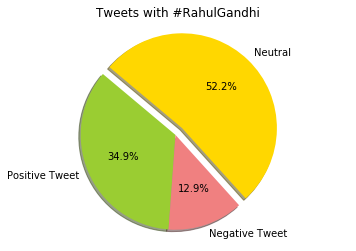

In [31]:
plt.pie(size, explode = explode, colors = colors, labels = label, autopct='%1.1f%%', shadow=True,startangle = 140)
plt.axis("Equal")
plt.title("Tweets with #RahulGandhi")
plt.show()